## Capstone

---

### EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [3]:
book_df = pd.read_csv('../data/book32-listing.csv', encoding_errors='ignore', header=None)

In [4]:
book_df.columns = ['amazon_index', 'filename', 'image_url', 'title', 'author', 'category_id', 'category']

In [5]:
book_df.head()

,amazon_index,filename,image_url,title,author,category_id,category
0,761183272,0761183272.jpg,http://ecx.images-amazon.com/images/I/61Y5cOdH...,Mom's Family Wall Calendar 2016,Sandra Boynton,3,Calendars
1,1623439671,1623439671.jpg,http://ecx.images-amazon.com/images/I/61t-hrSw...,Doug the Pug 2016 Wall Calendar,Doug the Pug,3,Calendars
2,B00O80WC6I,B00O80WC6I.jpg,http://ecx.images-amazon.com/images/I/41X-KQqs...,"Moleskine 2016 Weekly Notebook, 12M, Large, Bl...",Moleskine,3,Calendars
3,761182187,0761182187.jpg,http://ecx.images-amazon.com/images/I/61j-4gxJ...,365 Cats Color Page-A-Day Calendar 2016,Workman Publishing,3,Calendars
4,1578052084,1578052084.jpg,http://ecx.images-amazon.com/images/I/51Ry4Tsq...,Sierra Club Engagement Calendar 2016,Sierra Club,3,Calendars


In [28]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207572 entries, 0 to 207571
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   amazon_index  207572 non-null  object
 1   filename      207572 non-null  object
 2   image_url     207572 non-null  object
 3   title         207572 non-null  object
 4   author        193159 non-null  object
 5   category_id   207572 non-null  int64 
 6   category      207572 non-null  object
dtypes: int64(1), object(6)
memory usage: 11.1+ MB


In [83]:
book_df['category'].value_counts()

Travel                          18338
Children's Books                13605
Medical Books                   12086
Health, Fitness & Dieting       11886
Business & Money                 9965
Crafts, Hobbies & Home           9934
Science & Math                   9276
Christian Books & Bibles         9139
Cookbooks, Food & Wine           8802
Computers & Technology           7979
Literature & Fiction             7580
Religion & Spirituality          7559
Teen & Young Adult               7489
Law                              7314
Humor & Entertainment            6896
History                          6807
Arts & Photography               6460
Sports & Outdoors                5968
Romance                          4291
Biographies & Memoirs            4261
Science Fiction & Fantasy        3800
Politics & Social Sciences       3402
Reference                        3268
Comics & Graphic Novels          3026
Test Preparation                 2906
Self-Help                        2703
Engineering 

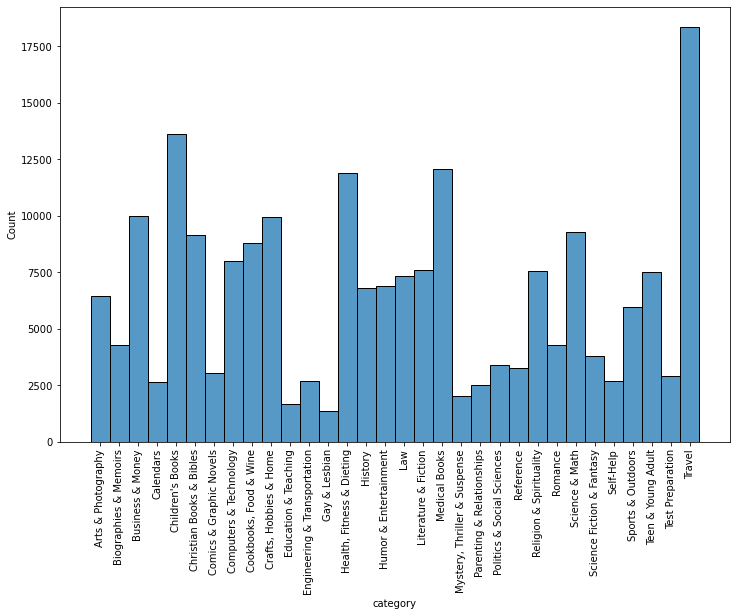

In [53]:
plt.figure(figsize=(12,8))
sns.histplot(book_df['category'].sort_values())
plt.xticks(rotation=90);

In [3]:
train = pd.read_csv('../data/book30-listing-train.csv', encoding_errors='ignore', header=None)
train.columns = ['amazon_index', 'filename', 'image_url', 'title', 'author', 'category_id', 'category']

In [4]:
train.head(2)

,amazon_index,filename,image_url,title,author,category_id,category
0,1588345297,1588345297.jpg,http://ecx.images-amazon.com/images/I/51l6XIoa...,With Schwarzkopf: Life Lessons of The Bear,Gus Lee,1,Biographies & Memoirs
1,1404803335,1404803335.jpg,http://ecx.images-amazon.com/images/I/51UJnL3T...,"Magnets: Pulling Together, Pushing Apart (Amaz...",Natalie M. Rosinsky,4,Children's Books


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51300 entries, 0 to 51299
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   amazon_index  51300 non-null  object
 1   filename      51300 non-null  object
 2   image_url     51300 non-null  object
 3   title         51300 non-null  object
 4   author        47863 non-null  object
 5   category_id   51300 non-null  int64 
 6   category      51300 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.7+ MB


In [6]:
train['category'].value_counts()

Biographies & Memoirs           1710
Children's Books                1710
Science Fiction & Fantasy       1710
Calendars                       1710
Self-Help                       1710
Teen & Young Adult              1710
Reference                       1710
Comics & Graphic Novels         1710
History                         1710
Romance                         1710
Parenting & Relationships       1710
Arts & Photography              1710
Test Preparation                1710
Computers & Technology          1710
Law                             1710
Humor & Entertainment           1710
Literature & Fiction            1710
Religion & Spirituality         1710
Crafts, Hobbies & Home          1710
Politics & Social Sciences      1710
Cookbooks, Food & Wine          1710
Business & Money                1710
Travel                          1710
Science & Math                  1710
Medical Books                   1710
Health, Fitness & Dieting       1710
Sports & Outdoors               1710
C

In [7]:
test = pd.read_csv('../data/book30-listing-test.csv', encoding_errors='ignore', header=None)
test.columns = ['amazon_index', 'filename', 'image_url', 'title', 'author', 'category_id', 'category']

In [8]:
test.head(2)

,amazon_index,filename,image_url,title,author,category_id,category
0,044310073X,044310073X.jpg,http://ecx.images-amazon.com/images/I/41kSLEos...,Oral and Maxillofacial Surgery: An Objective-B...,NaN,16,Medical Books
1,1438005687,1438005687.jpg,http://ecx.images-amazon.com/images/I/510l0qhi...,"Barron's GRE, 21st Edition",Sharon Weiner Green M.A.,28,Test Preparation


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   amazon_index  5700 non-null   object
 1   filename      5700 non-null   object
 2   image_url     5700 non-null   object
 3   title         5700 non-null   object
 4   author        5303 non-null   object
 5   category_id   5700 non-null   int64 
 6   category      5700 non-null   object
dtypes: int64(1), object(6)
memory usage: 311.8+ KB


In [75]:
test['category'] = test['category'].astype('category')

In [76]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   amazon_index  5700 non-null   object  
 1   filename      5700 non-null   object  
 2   image_url     5700 non-null   object  
 3   title         5700 non-null   object  
 4   author        5303 non-null   object  
 5   category_id   5700 non-null   int64   
 6   category      5700 non-null   category
dtypes: category(1), int64(1), object(5)
memory usage: 274.2+ KB


In [16]:
test['category'].value_counts()

Medical Books                   190
Test Preparation                190
Science Fiction & Fantasy       190
Romance                         190
Teen & Young Adult              190
Comics & Graphic Novels         190
History                         190
Calendars                       190
Reference                       190
Humor & Entertainment           190
Travel                          190
Crafts, Hobbies & Home          190
Cookbooks, Food & Wine          190
Computers & Technology          190
Sports & Outdoors               190
Parenting & Relationships       190
Business & Money                190
Health, Fitness & Dieting       190
Politics & Social Sciences      190
Law                             190
Self-Help                       190
Children's Books                190
Christian Books & Bibles        190
Science & Math                  190
Engineering & Transportation    190
Literature & Fiction            190
Arts & Photography              190
Religion & Spirituality     

In [14]:
train['category'].value_counts()

Biographies & Memoirs           1710
Children's Books                1710
Science Fiction & Fantasy       1710
Calendars                       1710
Self-Help                       1710
Teen & Young Adult              1710
Reference                       1710
Comics & Graphic Novels         1710
History                         1710
Romance                         1710
Parenting & Relationships       1710
Arts & Photography              1710
Test Preparation                1710
Computers & Technology          1710
Law                             1710
Humor & Entertainment           1710
Literature & Fiction            1710
Religion & Spirituality         1710
Crafts, Hobbies & Home          1710
Politics & Social Sciences      1710
Cookbooks, Food & Wine          1710
Business & Money                1710
Travel                          1710
Science & Math                  1710
Medical Books                   1710
Health, Fitness & Dieting       1710
Sports & Outdoors               1710
C

### Eliminating many categories for easier classification

In [31]:
train = train[train['category'] != 'Calendars']
train = train[train['category'] != 'Self-Help']
train = train[train['category'] != 'Reference']
train = train[train['category'] != 'Comics & Graphic Novels']
train = train[train['category'] != 'History']
train = train[train['category'] != 'Parenting & Relationships']
train = train[train['category'] != 'Arts & Photography']
train = train[train['category'] != 'Test Preparation']
train = train[train['category'] != 'Computers & Technology']
train = train[train['category'] != 'Law']
train = train[train['category'] != 'Humor & Entertainment']
train = train[train['category'] != 'Religion & Spirituality']
train = train[train['category'] != 'Crafts, Hobbies & Home']
train = train[train['category'] != 'Politics & Social Sciences']
train = train[train['category'] != 'Cookbooks, Food & Wine']
train = train[train['category'] != 'Business & Money']
train = train[train['category'] != 'Travel']
train = train[train['category'] != 'Science & Math']
train = train[train['category'] != 'Medical Books']
train = train[train['category'] != 'Health, Fitness & Dieting']
train = train[train['category'] != 'Sports & Outdoors']
train = train[train['category'] != 'Christian Books & Bibles']
train = train[train['category'] != 'Engineering & Transportation']

In [34]:
test = test[test['category'] != 'Calendars']
test = test[test['category'] != 'Self-Help']
test = test[test['category'] != 'Reference']
test = test[test['category'] != 'Comics & Graphic Novels']
test = test[test['category'] != 'History']
test = test[test['category'] != 'Parenting & Relationships']
test = test[test['category'] != 'Arts & Photography']
test = test[test['category'] != 'Test Preparation']
test = test[test['category'] != 'Computers & Technology']
test = test[test['category'] != 'Law']
test = test[test['category'] != 'Humor & Entertainment']
test = test[test['category'] != 'Religion & Spirituality']
test = test[test['category'] != 'Crafts, Hobbies & Home']
test = test[test['category'] != 'Politics & Social Sciences']
test = test[test['category'] != 'Cookbooks, Food & Wine']
test = test[test['category'] != 'Business & Money']
test = test[test['category'] != 'Travel']
test = test[test['category'] != 'Science & Math']
test = test[test['category'] != 'Medical Books']
test = test[test['category'] != 'Health, Fitness & Dieting']
test = test[test['category'] != 'Sports & Outdoors']
test = test[test['category'] != 'Christian Books & Bibles']
test = test[test['category'] != 'Engineering & Transportation']

In [36]:
train.to_csv('../data/train_cleaned.csv')

In [37]:
test.to_csv('../data/test_cleaned.csv')

In [6]:
pd.read_csv('../data/train_cleaned.csv', index_col=0).head(2)

,amazon_index,filename,image_url,title,author,category_id,category
0,1588345297,1588345297.jpg,http://ecx.images-amazon.com/images/I/51l6XIoa...,With Schwarzkopf: Life Lessons of The Bear,Gus Lee,1,Biographies & Memoirs
1,1404803335,1404803335.jpg,http://ecx.images-amazon.com/images/I/51UJnL3T...,"Magnets: Pulling Together, Pushing Apart (Amaz...",Natalie M. Rosinsky,4,Children's Books


In [7]:
book_df.head(2)

,amazon_index,filename,image_url,title,author,category_id,category
0,761183272,0761183272.jpg,http://ecx.images-amazon.com/images/I/61Y5cOdH...,Mom's Family Wall Calendar 2016,Sandra Boynton,3,Calendars
1,1623439671,1623439671.jpg,http://ecx.images-amazon.com/images/I/61t-hrSw...,Doug the Pug 2016 Wall Calendar,Doug the Pug,3,Calendars


In [13]:
book_df = book_df[book_df['category'] != 'Calendars']
book_df = book_df[book_df['category'] != 'Self-Help']
book_df = book_df[book_df['category'] != 'Reference']
book_df = book_df[book_df['category'] != 'Comics & Graphic Novels']
book_df = book_df[book_df['category'] != 'History']
book_df = book_df[book_df['category'] != 'Parenting & Relationships']
book_df = book_df[book_df['category'] != 'Arts & Photography']
book_df = book_df[book_df['category'] != 'Test Preparation']
book_df = book_df[book_df['category'] != 'Computers & Technology']
book_df = book_df[book_df['category'] != 'Law']
book_df = book_df[book_df['category'] != 'Humor & Entertainment']
book_df = book_df[book_df['category'] != 'Religion & Spirituality']
book_df = book_df[book_df['category'] != 'Crafts, Hobbies & Home']
book_df = book_df[book_df['category'] != 'Politics & Social Sciences']
book_df = book_df[book_df['category'] != 'Cookbooks, Food & Wine']
book_df = book_df[book_df['category'] != 'Business & Money']
book_df = book_df[book_df['category'] != 'Travel']
book_df = book_df[book_df['category'] != 'Science & Math']
book_df = book_df[book_df['category'] != 'Medical Books']
book_df = book_df[book_df['category'] != 'Health, Fitness & Dieting']
book_df = book_df[book_df['category'] != 'Sports & Outdoors']
book_df = book_df[book_df['category'] != 'Christian Books & Bibles']
book_df = book_df[book_df['category'] != 'Engineering & Transportation']
book_df = book_df[book_df['category'] != 'Education & Teaching']
book_df = book_df[book_df['category'] != 'Gay & Lesbian']

In [14]:
book_df['category'].value_counts()

Children's Books                13605
Literature & Fiction             7580
Teen & Young Adult               7489
Romance                          4291
Biographies & Memoirs            4261
Science Fiction & Fantasy        3800
Mystery, Thriller & Suspense     1998
Name: category, dtype: int64

In [16]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43024 entries, 8568 to 189233
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   amazon_index  43024 non-null  object
 1   filename      43024 non-null  object
 2   image_url     43024 non-null  object
 3   title         43024 non-null  object
 4   author        41253 non-null  object
 5   category_id   43024 non-null  int64 
 6   category      43024 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.6+ MB


In [17]:
book_df.to_csv('../data/full_book_list_cleaned.csv')

In [2]:
train = pd.read_csv('../data/train_cleaned.csv', index_col=0)
test = pd.read_csv('../data/test_cleaned.csv', index_col=0)

In [5]:
train['category'].value_counts()

Biographies & Memoirs           1710
Children's Books                1710
Literature & Fiction            1710
Romance                         1710
Teen & Young Adult              1710
Science Fiction & Fantasy       1710
Mystery, Thriller & Suspense    1710
Name: category, dtype: int64

In [11]:
train = train[train['category'] != 'Romance']
train = train[train['category'] != "Children's Books"]
test = test[test['category'] != 'Romance']
test = test[test['category'] != "Children's Books"]

In [10]:
train['category'].value_counts()

Biographies & Memoirs           1710
Literature & Fiction            1710
Teen & Young Adult              1710
Science Fiction & Fantasy       1710
Mystery, Thriller & Suspense    1710
Name: category, dtype: int64

In [12]:
test['category'].value_counts()

Biographies & Memoirs           190
Literature & Fiction            190
Teen & Young Adult              190
Science Fiction & Fantasy       190
Mystery, Thriller & Suspense    190
Name: category, dtype: int64

In [13]:
train.to_csv('../data/train_genre_cleaned.csv')
test.to_csv('../data/test_genre_cleaned.csv')